In [1]:
import glob
import netCDF4
import xarray 
import numpy as np
import datetime as dt
import pandas as pd
from pandas import DataFrame
from math import *

import os
import csv
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import matplotlib.colors as colors  # For truncating colorbars
import matplotlib.style as style
import xarray as xr                 # For dealing with netCDF data
import pandas as pd                 # A quick way to deal with time stamps
import cartopy.crs as ccrs
from polar_stereo_function import circular_polar_plot

In [17]:
file   = 'MERRA2_300.inst3_3d_asm_Np.20090109.nc4'
ds=xr.open_dataset(file)
ds


<xarray.Dataset>
Dimensions:  (lat: 361, lev: 42, lon: 576, time: 8)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.7 0.5 0.4 0.3 0.1
  * time     (time) datetime64[ns] 2009-01-09 ... 2009-01-09T21:00:00
Data variables: (12/14)
    EPV      (time, lev, lat, lon) float32 ...
    H        (time, lev, lat, lon) float32 ...
    O3       (time, lev, lat, lon) float32 ...
    OMEGA    (time, lev, lat, lon) float32 ...
    PHIS     (time, lat, lon) float32 ...
    PS       (time, lat, lon) float32 ...
    ...       ...
    QV       (time, lev, lat, lon) float32 ...
    RH       (time, lev, lat, lon) float32 ...
    SLP      (time, lat, lon) float32 ...
    T        (time, lev, lat, lon) float32 ...
    U        (time, lev, lat, lon) float32 ...
    V        (time, lev, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Mon Feb 16 04...
    Comment:                           GMAO filename: d5124_m2_jan00.inst3_3d...
    Filename:                          MERRA2_300.inst3_3d_asm_Np.20090109.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/QBZ6MG944HW0
    RangeBeginningDate:                2009-01-09
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2009-01-09
    RangeEndingTime:                   21:00:00.000000

In [ ]:
#surface pressure map
plt.figure(1)
plt.contourf(ds.PS[0,:,:],30,cmap='jet')
plt.xlabel('LONGITUDE INDEX')
plt.ylabel('LATITUDE INDEX')
plt.title('surface pressure')
plt.colorbar()


plt.show()

In [ ]:
boulder=ds.sel(time='2009-01-09T18:00:00', lon=-105.7,lat=40,method='nearest')
height= -np.log(boulder.lev*0.001)*8.
wind_speed=np.sqrt(np.power(boulder.U,2) + np.power(boulder.V,2))
north_pole=ds.sel(time='2009-01-09T18:00:00', lon=-105.7,lat=90,method='nearest')
wind_speedNP=np.sqrt(np.power(north_pole.U,2) + np.power(north_pole.V,2))

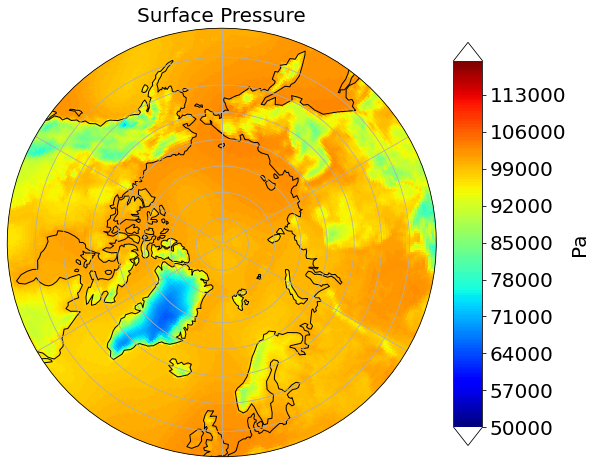

In [18]:
circular_polar_plot(ds.PS[0], 50, 'jet', 'Surface Pressure',
                    cbar_label='Pa', levels_=np.arange(50000,120000,500), cbar_levels_=np.arange(50000,120000,7000))

In [ ]:
#wind speed in boulder and the north pole
plt.plot(height,wind_speed,'go-', label='speed boulder')
plt.plot(height,boulder.U,'b:', label='U')
plt.plot(height,boulder.V,'r:',label='V')
plt.plot(height,wind_speedNP,'ko-', label='speed np')
plt.xlabel('Approximate altitude [km]')
plt.ylabel('Wind Speed [m/s]')
plt.legend()
plt.show()

In [ ]:
#wind speed from south to north pole along longitude 0
plt.contourf(ds.U.sel(time='2009-01-09T18:00:00',lon=0,method='nearest'),cmap='jet')
plt.xlabel('LATITUDE INDEX')
plt.ylabel('ALTITUDE INDEX')
plt.colorbar()

plt.show()

In [ ]:
#testing wind barbs
plt.barbs(boulder.U,boulder.V)

In [ ]:
test=ds.sel(time='2009-01-09T00:00:00', lon=slice(-160,-145),lat=slice(55,90),lev=5)


xx, yy = np.meshgrid(test.lon,test.lat)
magnitude = (test.U ** 2 + test.V ** 2) ** 0.5

In [ ]:
#wind barbs in Alaska at level 5
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-160, -145, 55, 80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.barbs(xx,yy,test.U,test.V, length=6,
             sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
            linewidth=0.95, transform=ccrs.PlateCarree())
#ax.streamplot(xx,yy,test.U.to_array(),test.V.to_array(),transform=ccrs.PlateCarree(),linewidth=2, density=2, color=magnitude)
plt.show()


In [ ]:
np.shape(ds['PS'])